# 十三、时间序列分析
时间序列是按时间顺序排列的、随时间变化且相互关联的**数据序列**. 对时间序列进行观察研究, 找寻它的发展规律, 预测它将来的走势就是**时间序列分析**.
时间序列根据所研究的依据不同, 可有不同的分类.
(1) 按所研究的对象的多少分, 有一元时间序列和多元时间序列.
(2) 按时间的连续性可将时间序列分为离散时间序列和连续时间序列两种.
(3) 按序列的统计特性分, 有平稳时间序列和非平稳时间序列. 如果一个时间序列的概率分布与时间 $t$ 无关, 则称该序列为**严格的 (狭义的) 平稳时间序列**. 如果序列的一、二阶矩存在, 而且对任意时刻 $t$ 满足: (i) 均值为常数; (ii) 协方差为时间间隔 $\tau$ 的函数, 则称该序列为**宽平稳时间序列**，也叫**广义平稳时间序列**.
(4) 按时间序列的分布规律来分, 有高斯型时间序列和非高斯型时间序列. 本章主要介绍一元时间序列分析.


## 1. 移动平均法、指数平滑法和季节模型


### 1.1 移动平均法
移动平均法是常用的时间序列预测方法, 由于其简单而具有很好的实用价值.
#### 1.1.1 一次移动平均法
设观测序列为 $y_{1}, \cdots, y_{T}$, 取移动平均的项数 $N<T$. 一次移动平均值计算公式为
$$
M_{t}^{(1)}(N)=\frac{1}{N}\left(y_{t}+y_{t-1}+\cdots+y_{t-N+1}\right)=\frac{1}{N} \sum_{i=0}^{N-1} y_{t-i} \tag{(1)}
$$
则有
$$
M_{t}^{(1)}(N)=\frac{1}{N}\left(y_{t-1}+\cdots+y_{t-N}\right)+\frac{1}{N}\left(y_{t}-y_{t-N}\right)=M_{t-1}^{(1)}(N)+\frac{1}{N}\left(y_{t}-y_{t-N}\right) \tag{(2)}
$$
$t+1$ 期的预测值为 $\hat{y}_{t+1}=M_{t}^{(1)}(N)$, 其预测标准误差为
$$
S=\sqrt{\frac{\sum_{t=N+1}^{T}\left(\hat{y}_{t}-y_{t}\right)^{2}}{T-N}} \tag{(3)}
$$
如果将 $\hat{y}_{t+1}$ 作为 $t+1$ 期的实际值, 那么就可以用 $\hat{y}_{t+1}=M_{t}^{(1)}(N)$ 计算第 $t+2$ 期预测值 $\hat{y}_{t+2}$. 一般地, 也可相应地求得以后各期的预测值. 但由于越远时期的预测, 误差越大, **因此一次移动平均法一般仅应用于一个时期后的预测值 (即预测第 $t+1$ 期)**.

**例** 汽车配件某年 $1 \sim 12$ 月份的化油器销售量 (单位: 只) 统计数据见下表中第 2 行, 试用一次移动平均法预测下一年 1 月份的销售量.
表 化油器销售量及一次移动平均法预测值表
\begin{array}{cccccccccccccc}
\hline
月份 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 & 12 & 顶测 \\
\hline
y_{i} & 423 & 358 & 434 & 445 & 527 & 429 & 426 & 502 & 480 & 384 & 427 & 446 & \\
N=3 & & & & 405 & 412 & 469 & 467 & 461 & 452 & 469 & 455 & 430 & 419 \\
N=5 & & & & & & 437 & 439 & 452 & 466 & 473 & 444 & 444 & 448 \\
\hline
\end{array}

分别取 $N=3, N=5$, 按预测公式
$$
\begin{gathered}
\hat{y}_{t+1}(3)=M_{t}^{1}(3)=\frac{y_{t}+y_{t-1}+y_{t-2}}{3}, \quad t=3,4, \cdots, 12, \\
\hat{y}_{t+1}(5)=M_{t}^{1}(5)=\frac{y_{t}+y_{t-1}+y_{t-2}+y_{t-3}+y_{t-4}}{5}, \quad t=5,6, \cdots, 12 .
\end{gathered}
$$
计算 3 个月和 5 个月移动平均预测值, 分别见上表第 3 行和第 4 行. $N=3$ 时, 预测的标准误差为 $56.5752 ; N=5$ 时, 预测的标准误差为 $39.8159$.
**通过上表可以看到, 实际数据波动较大, 经移动平均后, 随机波动明显减少, 且 $N$ 越大, 波动也越小. 同时, 也可以看到, 一次移动平均法的预测标准误差还是有些大, 对于实际数据波动较大的序列, 一般较少采用此法进行预测.**

In [ ]:
import numpy as np

y = np.array([423, 358, 434, 445, 527, 429, 426, 502, 480, 384, 427, 446])
def MoveAverage(y, N):
    Mt = ['*']*N
    for i in range(N+1, len(y) + 2):
        M = y[i-(N+1): i-1].mean()
        Mt.append(M)
    return Mt


yt3 = MoveAverage(y, 3)
s3 = np.sqrt(((y[3:] - yt3[3: -1])**2).mean())

yt5 = MoveAverage(y, 5)
s5 = np.sqrt(((y[5:] - yt5[5: -1])**2).mean())

print('N=3时,预测值：', yt3, '，预测的标准误差：', s3)
print('N=5时,预测值：', yt5, '，预测的标准误差：', s5)

N=3时,预测值： ['*', '*', '*', 405.0, 412.3333333333333, 468.6666666666667, 467.0, 460.6666666666667, 452.3333333333333, 469.3333333333333, 455.3333333333333, 430.3333333333333, 419.0] ，预测的标准误差： 56.57519850976887
N=5时,预测值： ['*', '*', '*', '*', '*', 437.4, 438.6, 452.2, 465.8, 472.8, 444.2, 443.8, 447.8] ，预测的标准误差： 39.815861878689226


简单移动平均使用的是等量加权策略，可以利用卷积，相应代码如下：

In [ ]:
def sma(arr, n):
    weights = np.ones(n)/n
    return np.convolve(weights, arr)[n-1: -n+1]

In [ ]:
# 上例的Python程序也可以改写如下
import numpy as np

y = np.array([423, 358, 434, 445, 527, 429, 426, 502, 480, 384, 427, 446])

n1 = 3
print(np.convolve(np.ones(n1)/n1, y))
yt1 = np.convolve(np.ones(n1)/n1, y)[n1-1: -n1+1]
s1 = np.sqrt(((y[n1:]-yt1[:-1])**2).mean())

n2 = 5
yt2 = np.convolve(np.ones(n2)/n2, y)[n2-1: -n2+1]
s2 = np.sqrt(((y[n2:]-yt2[:-1])**2).mean())

print('N=3时,预测值：', yt1, '，预测的标准误差：', s1)
print('N=5时,预测值：', yt2, '，预测的标准误差：', s2)

[141.         260.33333333 405.         412.33333333 468.66666667
 467.         460.66666667 452.33333333 469.33333333 455.33333333
 430.33333333 419.         291.         148.66666667]
N=3时,预测值： [405.         412.33333333 468.66666667 467.         460.66666667
 452.33333333 469.33333333 455.33333333 430.33333333 419.        ] ，预测的标准误差： 56.57519850976887
N=5时,预测值： [437.4 438.6 452.2 465.8 472.8 444.2 443.8 447.8] ，预测的标准误差： 39.81586187868923


#### 1.1.2 二次移动平均法

**当预测变量的基本趋势发生变化时, 一次移动平均法不能迅速适应这种变化. 当时间序列的变化为线性趋势时, 一次移动平均法的滞后偏差使预测值偏低, 不能进行合理的趋势外推.**
二次移动平均值计算公式为
$$
M_{t}^{(2)}=\frac{1}{N}\left(M_{t}^{(1)}+\cdots+M_{t-N+1}^{(1)}\right)=M_{t-1}^{(2)}+\frac{1}{N}\left(M_{t}^{(1)}-M_{t-N}^{(1)}\right) \tag{(4)}
$$
**当预测目标的基本趋势是在某一水平上下波动时, 可用一次移动平均方法建立预测模型. 当预测目标的基本趋势与某一线性模型相吻合时, 常用二次移动平均法. 但序列同时存在线性趋势与周期波动时, 可用趋势移动平均法建立预测模型**
$$
\hat{y}_{T+m}=a_{T}+b_{T} m, \quad m=1,2, \cdots \tag{(5)}
$$
其中 $a_{T}=2 M_{T}^{(1)}-M_{T}^{(2)}, b_{T}=\frac{2}{N-1}\left(M_{T}^{(1)}-M_{T}^{(2)}\right)$.

#### 1.1.3 适用范围

\begin{array}{c|c}
\hline
& 使用条件\\
\hline
一次移动平均法 & 预测目标基本趋势在某一水平上下波动\\
\hline
二次移动平均法 & 预测目标基本趋势与某一线性模型相吻合\\
\hline
趋势移动平均法 & 序列同时存在线性趋势与周期波动\\
\hline
\end{array}
移动平均法只适合**做近期预测**， 而且是**预测目标的发展趋势变化不大**的情况。如果目标的发展趋势存在其他变化，采用简单移动平均法就会产生**较大的预测偏差和滞后**。

### 1.2 指数平滑法
一次移动平均法实际上认为最近 $N$ 期数据对末来值影响相同, 都加权 $1 / N$, 而 $N$ 期以前的数据对末来值没有影响, 加权为 0 . 但是, 二次及更高次移动平均法的权数却不是 $1 / N$, 且次数越高, 权数的结构越复杂, 但永远保持对称的权数, 即两端项权数小、中间项权数大, **不符合一般系统的动态性**. 一般来说历史数据对末来值的影响是随时间间隔的增长而递减的. 所以, 更切合实际的方法应是对各期观测值依时间顺序进行加权平均作为预测值. 指数平滑法可满足这一要求, 而且具有简单的递推形式.
指数平滑法根据平滑次数的不同, 又分为一次指数平滑法和二次指数平滑法等. **指数平滑法最适合用于简单的时间序列分析和中、短期预测.**

#### 1.2.1 一次指数平滑法
##### 1.2.1.1 预测模型
设时间序列为 $y_{1}, y_{2}, \cdots, y_{t}, \cdots, \alpha$ 为加权系数, $0<\alpha<1$, 一次指数平滑的预测公式为
$$
\hat{y}_{t+1}=S_{t}^{(1)}=\alpha y_{t}+(1-\alpha) S_{t-1}^{(1)}=S_{t-1}^{(1)}+\alpha\left(y_{t}-S_{t-1}^{(1)}\right), \tag{(6)}
$$
其中, $\hat{y}_{t+1}$ 表示第 $t+1$ 期预测值; $S_{t}^{(1)}, S_{t-1}^{(1)}$ 分别表示第 $t, t-1$ 期一次指数平滑值.
为进一步理解指数平滑的实质, 把 (6) 式依次展开, 有
$$
S_{t}^{(1)}=\alpha y_{t}+(1-\alpha)\left[\alpha y_{t-1}+(1-\alpha) S_{t-2}^{(1)}\right]=\cdots=\alpha \sum_{j=0}^{\infty}(1-\alpha)^{j} y_{t-j} \tag{(7)}
$$
(7) 式表明 $S_{t}^{(1)}$ 是全部历史数据的加权平均, 加权系数分别为 $\alpha, \alpha(1-\alpha), \alpha(1-$ $\alpha)^{2}, \cdots$, 显然有
$$
\sum_{j=0}^{\infty} \alpha(1-\alpha)^{j}=\frac{\alpha}{1-(1-\alpha)}=1,
$$
由于加权系数符合指数规律, 又具有平滑数据的功能, 故称为**指数平滑**.

##### 1.2.1.2 加权系数的选择
在进行指数平滑时, 加权系数的选择是很重要的. 由式 (7) 可以看出, $\alpha$ 的大小规定了在新预测值中新数据和原预测值所占的比重. $\alpha$ 值越大, 新数据所占的比重就越大, 原预测值所占的比重就越小, 反之亦然. 若把式 (6) 改写为
$$
\hat{y}_{t+1}=\hat{y}_{t}+\alpha\left(y_{t}-\hat{y}_{t}\right) \tag{(8)}
$$
则从式 (8) 可看出, 新预测值是根据预测误差对原预测值进行修正而得到的. $\alpha$ 的大小则体现了修正的幅度, $\alpha$ 值越大, 修正幅度越大; $\alpha$ 值越小, 修正幅度也越小.
若选取 $\alpha=0$, 则 $\hat{y}_{t+1}=\hat{y}_{t}$, 即下期预测值就等于本期预测值, 在预测过程中不考虑任何新信息; 若选取 $\alpha=1$, 则 $\hat{y}_{t+1}=y_{t}$, 即下期预测值就等于本期观测值, 完全不相信过去的信息. 这两种极端情况很难做出正确的预测. 因此, $\alpha$ 值应根据时间序列的具体性质在 $0 \sim 1$ 之间选择. 具体如何选择一般可邆循以下原则: (1) 如果时间序列波动不大, 比较平稳, 则 $\alpha$ 应取小一点, 如 $0.1 \sim 0.5$, 以减少修正幅度, 使预测模型能包含较长时间序列的信息; (2) 如果时间序列具有迅速且明显的变动倾向, 则 $\alpha$ 应取大一点, 如 $0.6 \sim 0.8$, 使预测模型灵敏度高一些, 以便迅速跟上数据的变化.
**在实用中, 类似移动平均法, 多取几个 $\alpha$ 值进行试算, 看哪个预测误差小, 就采用哪个.**
##### 1.2.1.3 初始值的确定
用一次指数平滑法进行预测, 除了选择合适的 $\alpha$ 外, 还要确定初始值 $S_{0}^{(1)}$. 初始值是由预测者估计或指定的. 当时间序列的数据较多, 比如在 20 个以上时, 初始值对以后的预测值影响很少, 可选用第一期数据为初始值. 如果时间序列的数据较少, 在 20 个以下时, 初始值对以后的预测值影响很大。 这时, 就必须认真研究如何正确确定初始值. **一般以最初几期实际值的平均值作为初始值.**

**例** 某产品的 11 期价格如下表所示. 试预测该产品第 12 期的价格.
表 某产品价格及指数平滑预测值计算表
\begin{array}{clccc}
\hline
时期 t & 价格 y_{t} & 预测值 \hat{y}_{t}(\alpha=0.2) & 预测值 \hat{y}_{t}(\alpha=0.5) & 预测值 \hat{y}_{t}(\alpha=0.8) \\
\hline
1 & 4.81 & 4.805 & 4.805 & 4.805 \\
2 & 4.8 & 4.806 & 4.808 & 4.809 \\
3 & 4.73 & 4.805 & 4.804 & 4.802 \\
4 & 4.7 & 4.790 & 4.767 & 4.744 \\
5 & 4.7 & 4.772 & 4.733 & 4.709 \\
6 & 4.73 & 4.757 & 4.717 & 4.702 \\
7 & 4.75 & 4.752 & 4.723 & 4.724 \\
8 & 4.75 & 4.752 & 4.737 & 4.745 \\
9 & 5.43 & 4.751 & 4.743 & 4.749 \\
10 & 5.78 & 4.887 & 5.087 & 5.294 \\
11 & 5.85 & 5.066 & 5.433 & 5.683 \\
12 & & & & 5.817 \\
\hline
\end{array}

采用指数平滑法, 并分别取 $\alpha=0.2,0.5$ 和 $0.8$ 进行计算, 初始值
$$
S_{0}^{(1)}=\frac{y_{1}+y_{2}}{2}=4.805,
$$
即
$$
\hat{y}_{1}=S_{0}^{(1)}=4.805 .
$$
按预测模型
$$
\hat{y}_{t+1}=\alpha y_{t}+(1-\alpha) \hat{y}_{t},
$$
计算各期预测值, 列于上表中.
从上表可以看出, $\alpha=0.2,0.5$ 和 $0.8$ 时, 预测值是很不相同的. 究竟 $\alpha$ 取何值为好, 可通过计算它们的预测标准误差 $S$, 选取使 $S$ 较小的那个 $\alpha$ 值. 预测的标准误差见x下表. 计算结果表明 $\alpha=0.8$ 时, $S$ 较小, 故选取 $\alpha=0.8$, 该产品第 12 期价格的预测值为 $\hat{y}_{12}=5.817$.
表 预测的标准误差
\begin{array}{cccc}
\hline
\alpha & 0.2 & 0.5 & 0.8 \\
\hline
S & 0.4148 & 0.3216 & 0.2588 \\
\hline
\end{array}

In [ ]:
import numpy as np
import pandas as pd

y = np.array([4.81, 4.8, 4.73, 4.7, 4.7, 4.73, 4.75, 4.75, 5.43, 5.78, 5.85])
def ExpMove(y, a):
    n = len(y)
    M = np.zeros(n)
    M[0] = (y[0]+y[1])/2
    for i in range(1, len(y)):
        M[i] = a*y[i-1] + (1-a)*M[i-1]
    return M

yt1 = ExpMove(y, 0.2)
yt2 = ExpMove(y, 0.5)
yt3 = ExpMove(y, 0.8)
s1 = np.sqrt(((y-yt1)**2).mean())
s2 = np.sqrt(((y-yt2)**2).mean())
s3 = np.sqrt(((y-yt3)**2).mean())
d = pd.DataFrame(np.c_[y, yt1, yt2, yt3])
# f = pd.ExcelWriter("Pdata18_2.xlsx");
# d.to_excel(f)
# f.close()  #数据写入Excel文件，便于做表
print(d)
print("预测的标准误差分别为：", s1, s2, s3)  #输出预测的标准误差
yh = 0.8*y[-1] + 0.2*yt3[-1]
print("下一期的预测值为：", yh)

       0         1         2         3
0   4.81  4.805000  4.805000  4.805000
1   4.80  4.806000  4.807500  4.809000
2   4.73  4.804800  4.803750  4.801800
3   4.70  4.789840  4.766875  4.744360
4   4.70  4.771872  4.733437  4.708872
5   4.73  4.757498  4.716719  4.701774
6   4.75  4.751998  4.723359  4.724355
7   4.75  4.751598  4.736680  4.744871
8   5.43  4.751279  4.743340  4.748974
9   5.78  4.887023  5.086670  5.293795
10  5.85  5.065618  5.433335  5.682759
预测的标准误差分别为： 0.4148362642161784 0.32164247683489516 0.25883473030674825
下一期的预测值为： 5.8165517935616


#### 1.2.2 二次指数平滑法
一次指数平滑法虽然克服了移动平均法的缺点. 但**当时间序列的变动出现直线趋势时, 用一次指数平滑法进行预测, 仍存在明显的滞后偏差**. 因此, 也必须加以修正. 再作二次指数平滑, 利用滞后偏差的规律建立直线趋势模型, 这就是二次指数平滑法. 其计算公式为
$$
\left\{\begin{array}{l}
S_{t}^{(1)}=\alpha y_{t}+(1-\alpha) S_{t-1}^{(1)}, \\
S_{t}^{(2)}=\alpha S_{t}^{(1)}+(1-\alpha) S_{t-1}^{(2)},
\end{array}\right.
$$
式中 $S_{t}^{(1)}$ 为一次指数的平滑值; $S_{t}^{(2)}$ 为二次指数的平滑值. 当时间序列 $\left\{y_{t}\right\}$ 从某时期开始具有**直线趋势**时, 可用直线趋势模型
$$
\hat{y}_{t+m}=a_{t}+b_{t} m, \quad m=1,2, \cdot \tag{(10)}
$$
$$
\left\{
\begin{array}{l}
a_{t}=2 S_{t}^{(1)}-S_{t}^{(2)}, \\
b_{t}=\frac{\alpha}{1-\alpha}\left(S_{t}^{(1)}-S_{t}^{(2)}\right)
\end{array}
\right. \tag{(11)}
$$
进行预测.
把式 (11) 代入式 (10), 并令 $m=1$, 得
$$
\hat{y}_{t+1}=2 S_{t}^{(1)}-S_{t}^{(2)}+\frac{\alpha}{1-\alpha}\left(S_{t}^{(1)}-S_{t}^{(2)}\right) \tag{(12)}
$$

**例** 已知某厂 10 期的钢产量如下表所示, 试预测第 11, 12 期的钢产量.
表 某厂10期的钢产量及预测值
\begin{array}{cllll}
\hline
t & \text { 钢产量 } y_{t} & \text { 一次平滑值 } & \text { 二次平滑值 } & \text { 预测值 } \hat{y}_{t} \\
\hline
1 & 2031 & 2031 & 2031 & \\
2 & 2234 & 2091.9 & 2049.27 & 2031 \\
3 & 2566 & 2234.13 & 2104.728 & 2152.8 \\
4 & 2820 & 2409.891 & 2196.277 & 2418.99 \\
5 & 3006 & 2588.724 & 2314.011 & 2715.054 \\
6 & 3093 & 2740.007 & 2441.81 & 2981.171 \\
7 & 3277 & 2901.105 & 2579.598 & 3166.002 \\
8 & 3514 & 3084.973 & 2731.211 & 3360.4 \\
9 & 3770 & 3290.481 & 2898.992 & 3590.348 \\
10 & 4107 & 3535.437 & 3089.925 & 3849.752 \\
11 & & & & 4171.882 \\
12 & & & & 4362.815 \\
\hline
\end{array}

取 $\alpha=0.3$, 初始值 $S_{0}^{(1)}$ 和 $S_{0}^{(2)}$ 都取序列的首项数值, 即 $S_{0}^{(1)}=S_{0}^{(2)}=2031$. 计算 $S_{t}^{(1)}, S_{t}^{(2)}$, 列于上表, 得到
$$
S_{10}^{(1)}=3535.437, \quad S_{10}^{(2)}=3089.925 .
$$
由公式 (11), 可得 $t=10$ 时
$$
a_{10}=2 S_{10}^{(1)}-S_{10}^{(2)}=3980.9484, \quad b_{10}=\frac{\alpha}{1-\alpha}\left(S_{10}^{(1)}-S_{10}^{(2)}\right)=190.9335,
$$
于是, 得 $t=10$ 时直线趋势方程为
$$
\hat{y}_{10+m}=3980.9484+190.9335 m \text {. }
$$
预测第 11,12 期的钢产量为
$$
\hat{y}_{11}=\hat{y}_{10+1}=4171.8819, \quad \hat{y}_{12}=\hat{y}_{10+2}=4362.8154 .
$$
利用
$$
\hat{y}_{t+1}=2 S_{t}^{(1)}-S_{t}^{(2)}+\frac{\alpha}{1-\alpha}\left(S_{t}^{(1)}-S_{t}^{(2)}\right), \quad t=0,1, \cdots, 9,
$$
求已知各期的预测值. 计算结果见上表.

In [ ]:
import numpy as np
import pandas as pd

y = np.array([2031, 2234, 2566, 2820, 3006, 3093, 3277, 3514, 3770, 4107])
n = len(y)
alpha = 0.3
yh = np.zeros(n)
s1 = np.zeros(n)
s2 = np.zeros(n)
s1[0] = y[0]
s2[0] = y[0]
for i in range(1, n):
    s1[i] = alpha*y[i] + (1-alpha)*s1[i-1]
    s2[i] = alpha*s1[i] + (1-alpha)*s2[i-1]
    yh[i] = 2*s1[i-1] - s2[i-1] + alpha/(1-alpha)*(s1[i-1]-s2[i-1])
at = 2*s1[-1] - s2[-1]
bt = alpha/(1-alpha)*(s1[-1]-s2[-1])
m = np.array([1, 2])
yh2 = at + bt*m
print("预测值为：", yh2)
d = pd.DataFrame(np.c_[s1, s2, yh])
print(d)

预测值为： [4171.88192538 4362.81543832]
             0            1            2
0  2031.000000  2031.000000     0.000000
1  2091.900000  2049.270000  2031.000000
2  2234.130000  2104.728000  2152.800000
3  2409.891000  2196.276900  2418.990000
4  2588.723700  2314.010940  2715.054000
5  2740.006590  2441.809635  2981.170500
6  2901.104613  2579.598128  3166.002240
7  3084.973229  2731.210659  3360.399591
8  3290.481260  2898.991839  3590.348330
9  3535.436882  3089.925352  3849.751862


### 1.3 具有季节性时间序列的预测

这里提到的季节, 可以是自然季节, 也可以是某种产品的销售季节等. 显然, 在现实的经济活动中, 表现为季节性的时间序列是非常多的. 比如, 空调、季节性服装的生产与销售所产生的数据等. **对于季节性时间序列的预测, 要从数学上完全拟合其变化曲线是非常困难的.** 但预测的目的是为了找到时间序列的变化趋势, 尽可能地做到精确. 从这个意义上讲, 可以有多种方法, 下面介绍其中一种, 即所谓**季节系数法**. 季节系数法的具体计算步骤如下.
(1) 收集 $m$ 年的每年各季度 (每年 $n$ 个季度) 或者各月份的时间序列样本数据 $a_{i j}$. 其中, $i$ 表示年份的序号 $(i=1,2, \cdots, m), j$ 表示季度或者月份的序号 $(j=1,2, \cdots, n)$.
(2) 计算每年所有季度或所有月份的算术平均值 $\bar{a}$, 即
$$
\bar{a}=\frac{1}{k} \sum_{i=1}^{m} \sum_{j=1}^{n} a_{i j}, \quad k=m n .
$$
(3) 计算同季度或同月份数据的算术平均值 $\bar{a}_{\cdot j}=\frac{1}{m} \sum_{i=1}^{m} a_{i j}, j=1,2, \cdots, n$.
(4) 计算**季度系数**或**月份系数** $b_{j}=\bar{a}_{\cdot j} / \bar{a}$.
(5) 预测计算. 当时间序列是按季度列出时, 先求出预测年份 (下一年) 的年加权平均
$$
y_{m+1}=\frac{\sum_{i=1}^{m} w_{i} y_{i}}{\sum_{i=1}^{n} w_{i}} .
$$
式中, $y_{i}=\sum_{j=1}^{n} a_{i j}$ 为第 $i$ 年的合计数; $w_{i}$ 为第 $i$ 年的权数, 按自然数列取值, 即 $w_{i}=i$. 再计算预测年份的季度平均值 $\bar{y}_{m+1}=y_{m+1} / n$. 最后, 预测年份第 $j$ 季度的预测值为
$$
y_{m+1, j}=b_{j} \bar{y}_{m+1}
$$

**例** 某商店按季度统计的 3 年 (12 个季度) 冰箱的销售数据 (单位: 万元) 见下表. 求 2004 年 4 个季度的销售额.
表 某商店12个季度冰箱销售资料
\begin{array}{ccccc}
\hline
年份 & 一季度 & 二季度 & 三季度 & 四季度 \\
\hline
2001 & 265 & 373 & 333 & 266 \\
2002 & 251 & 379 & 374 & 309 \\
2003 & 272 & 437 & 396 & 348 \\
\hline
\end{array}

**解** 求得 2004 年 4 个季度的销售额分别为 $269.7534$ 万元、407.0263 万元、 $377.5862$ 万元、 $315.9674$ 万元.

In [ ]:
import numpy as np

a = np.array([
    [265, 373, 333, 266],
    [251, 379 ,374, 309],
    [272, 437, 396, 348]
])

m, n = a.shape
a_mean = a.mean()  #计算所有数据的平均值
c_mean = a.mean(axis=0)  #逐列求均值
b = c_mean/a_mean   #计算季节系数
w = np.arange(1, m+1)
yh = w.dot(a.sum(axis=1))/w.sum()  #计算下一年的预测值
yj = yh/n  #计算预测年份的季度平均值
yjh = yj*b  #计算季度预测值
print("下一年度各季度的预测值为：", yjh)

下一年度各季度的预测值为： [269.75335165 407.0263136  377.586227   315.96744109]


## 2. 平稳时间序列分析
这里的平稳是指**宽平稳**, 其特性是**序列的统计特性不随时间的平移而变化, 即均值和协方差不随时间的平移而变化.**

### 2.1 基本概念和理论
#### 2.1.1 几个定义
**定义1** 给定随机过程 $\left\{X_{t}, t \in T\right\}$. 固定 $t, X_{t}$ 是一个随机变量, 设其均值为 $\mu_{t}$, 当 $t$ 变动时, 此均值是 $t$ 的函数, 记为 $\mu_{t}=E\left(X_{t}\right)$, 称为随机过程的**均值函数**.
固定 $t$, 设 $X_{t}$ 的方差为 $\sigma_{t}^{2}$. 当 $t$ 变动时, 这个方差也是 $t$ 的函数, 记为
$$
\sigma_{t}^{2}=\operatorname{Var}\left(X_{t}\right)=E\left[\left(X_{t}-\mu_{t}\right)^{2}\right],
$$
称为随机过程的**方差函数**. 方差函数的平方根 $\sigma_{t}$ 称为随机过程的**标准差函数**, 它表示随机过程 $X_{t}$ 对于均值函数 $\mu_{t}$ 的偏离程度.
**定义2** 对随机过程 $\left\{X_{t}, t \in T\right\}$, 取定 $t, s \in T$, 定义其**自协方差函数**为
$$
\gamma_{t, s}=\operatorname{Cov}\left(X_{t}, X_{s}\right)=E\left[\left(X_{t}-\mu_{t}\right)\left(X_{s}-\mu_{s}\right)\right],
$$
为刻画 $\left\{X_{t}, t \in T\right\}$ 在时刻 $t$ 与 $s$ 之间的相关性, 还可将 $\gamma_{t, s}$ 标准化, 即定义**自相关函数**
$$
\rho_{t, s}=\frac{\gamma_{t, s}}{\sqrt{\gamma_{t, t}} \sqrt{\gamma_{s, s}}}=\frac{\gamma_{t, s}}{\sigma_{t} \sigma_{s}} .
$$
因此, 自相关函数 $\rho_{t, s}$ 是标准化自协方差函数.
**定义3** 设随机序列 $\left\{X_{t}, t=0, \pm 1, \pm 2, \cdots\right\}$ 满足
(1) $E\left(X_{t}\right)=\mu=$ 常数;
(2) $\gamma_{t+k, t}=\gamma_{k}(k=0, \pm 1, \pm 2, \cdots)$ 与 $t$ 无关, **即$\gamma_{t+k, t}$只依赖于k**.(由此可以得出，$X_t$的方差均相同)。
则称 $X_{t}$ 为**平稳随机序列 (平稳时间序列)**, 简称**平稳序列**.
**定义4** 设平稳序列 $\left\{\varepsilon_{t}, t=0, \pm 1, \pm 2, \cdots\right\}$ 的自协方差函数 $\gamma_{k}$ 是
$$
\gamma_{k}=\sigma^{2} \delta_{k, 0}= \begin{cases}0, & k \neq 0, \\ \sigma^{2}, & k=0,\end{cases}
$$
其中 $\delta_{k, 0}=\left\{\begin{array}{ll}1, & k=0, \\ 0, & k \neq 0,\end{array}\right.$ 则称该序列为**平稳白噪声序列**.
平稳白噪声序列的方差是常数 $\sigma^{2}$, 因为 $\gamma_{k}=0(k \neq 0)$, 则 $\varepsilon_{t}$ 的任意两个不同时点之间是不相关的. **平稳白噪声序列是一种最基本的平稳序列.**
\begin{array}{|c|c|}
\hline
平稳时间序列 & 均值相同；方差相同；协方差只依赖于下标间距\\
\hline
平稳白噪声序列 & 均值相同；方差相同；任意两个不同时点不相关\\
\hline
\end{array}
**定义5** 设 $\left\{\varepsilon_{t}, t=0, \pm 1, \pm 2, \cdots\right\}$ 是零均值平稳白噪声, $\operatorname{Var}\left(\varepsilon_{t}\right)=\sigma_{\varepsilon}^{2}$. 若 $\left\{G_{k}, k=0,1,2, \cdots\right\}$ 是一数列, 满足
$$
\sum_{k=0}^{\infty}\left|G_{k}\right|<\infty, \quad G_{0}=1 \tag{(13)}
$$
定义随机序列
$$
X_{t}=\sum_{k=0}^{\infty} G_{k} \varepsilon_{t-k} \tag{(14)}
$$
则 $X_{t}$ 称为**随机线性序列**. 在条件 (13) 下, 可证式 (14) 中的 $X_{t}$ 是平稳序列. 若零均值平稳序列 $X_{t}$ 能表示为式 (14) 的形式, 这种形式称为**传递形式**, $\left\{G_{k}, k=0,1,2, \cdots\right\}$ 称为**Green函数**.
**定义6** 设 $\left\{X_{t}, t=0, \pm 1, \pm 2, \cdots\right\}$ 是零均值平稳序列, 从时间序列预报的角度引出**偏相关函数**的定义. 如果已知 $\left\{X_{t-1}, X_{t-2}, \cdots, X_{t-k}\right\}$ 的值, 要求对 $X_{t}$ 做出预报. 此时, 可以考虑 $\left\{X_{t-1}, X_{t-2}, \cdots, X_{t-k}\right\}$ 对 $X_{t}$ 的**线性最小均方估计**, 即选择系数 $\phi_{k, 1}, \phi_{k, 2}, \cdots, \phi_{k, k}$, 使得
$$
\min \delta=E\left[\left(X_{t}-\sum_{j=1}^{k} \phi_{k, j} X_{t-j}\right)^{2}\right]
$$
将 $\delta$ 展开, 得
$$
\delta=\gamma_{0}-2 \sum_{j=1}^{k} \phi_{k, j} \gamma_{j}+\sum_{j=1}^{k} \sum_{i=1}^{k} \phi_{k, j} \phi_{k, i} \gamma_{j-i}
$$
令 $\frac{\partial \delta}{\partial \phi_{k, j}}=0, j=1,2, \cdots, k$, 得
$$
-\gamma_{j}+\sum_{i=1}^{k} \phi_{k, i} \gamma_{j-i}=0, \quad j=1,2, \cdots, k .
$$
两端同除 $\gamma_{0}$ 并写成矩阵形式, 可知 $\phi_{k, j}$ 应满足下列线性方程组
$$
\left[\begin{array}{cccc}
1 & \rho_{1} & \cdots & \rho_{k-1} \\
\rho_{1} & 1 & \cdots & \rho_{k-2} \\
\vdots & \vdots & & \vdots \\
\rho_{k-1} & \rho_{k-2} & \cdots & 1
\end{array}\right]\left[\begin{array}{c}
\phi_{k, 1} \\
\phi_{k, 2} \\
\vdots \\
\phi_{k, k}
\end{array}\right]=\left[\begin{array}{c}
\rho_{1} \\
\rho_{2} \\
\vdots \\
\rho_{k}
\end{array}\right] \tag{(15)}
$$
式 (15) 称为**Yule-Walker方程**, 称 $\left\{\phi_{k, k}, k=1,2, \cdots\right\}$ 为 $X_{t}$ 的**偏相关函数**.

#### 2.1.2 ARMA序列
下面介绍一种重要的平稳时间序列―ARMA时间序列. ARMA时间序列分为三种类型:
(1) AR (auto regressive) 序列, 即**自回归序列**;
(2) MA (moving average) 序列, 即**移动平均序列**;
(3) ARMA (auto regressive moving average) 序列, 即**自回归移动平均序列**.
##### 2.1.2.1 AR(p) 序列
设 $\left\{X_{t}, t=0, \pm 1, \pm 2, \cdots\right\}$ 是**零均值平稳序列**, 满足下列模型
$$
X_{t}=\phi_{1} X_{t-1}+\phi_{2} X_{t-2}+\cdots+\phi_{p} X_{t-p}+\varepsilon_{t} \tag{(16)}
$$
其中 $\varepsilon_{t}$ 是均值为零、方差为 $\sigma_{\varepsilon}^{2}$ 的平稳白噪声, 则称 $X_{t}$ 是**阶数为 $p$ 的自回归序列**, 简记为 $\operatorname{AR}(p)$ 序列, 而 $\phi=\left[\phi_{1}, \phi_{2}, \cdots, \phi_{p}\right]^{\mathrm{T}}$ 称为**自回归参数向量**, 其分量 $\phi_{j}, j=1,2, \cdots, p$ 称为**自回归系数**.
引进后移算子对描述式 (18.16) 比较方便. 算子 $B$ 定义如下
$$
B X_{t} \equiv X_{t-1}, \quad B^{k} X_{t} \equiv X_{t-k} \tag{(17)}
$$
记算子多项式
$$
\phi(B)=1-\phi_{1} B-\phi_{2} B^{2}-\cdots-\phi_{p} B^{p}, (\phi_p \neq 0)
$$
则式 (16) 可以改写为 $\phi(B) X_{t}=\varepsilon_{t}$.

##### 2.1.2.2 MA(q) 序列
设 $\left\{X_{t}, t=0, \pm 1, \pm 2, \cdots\right\}$ 是**零均值平稳序列**, 满足下列模型
$$
X_{t}=\varepsilon_{t}-\theta_{1} \varepsilon_{t-1}-\theta_{2} \varepsilon_{t-2}-\cdots-\theta_{q} \varepsilon_{t-q} \tag{(18)}
$$
其中 $\varepsilon_{t}$ 是均值为零、方差为 $\sigma_{\varepsilon}^{2}$ 的平稳白噪声, 则称 **$X_{t}$ 是阶数为 $q$ 的移动平均序列**, 简记为 $\mathrm{MA}(q)$ 序列, 而 $\theta=\left[\theta_{1}, \theta_{2}, \cdots, \theta_{q}\right]^{\mathrm{T}}$ 称为**移动平均参数向量**, 其分量 $\theta_{j}, j=1,2, \cdots, q$ 称为**移动平均系数**.
在工程上, 一个平稳白噪声发生器通过一个线性系统, 如果其输出是白噪声的线性叠加, 那么这一输出服从 MA 模型.
对于线性后移算子 $B$, 有 $B \varepsilon_{t} \equiv \varepsilon_{t-1}, B^{k} \varepsilon_{t} \equiv \varepsilon_{t-k}$, 再引进算子多项式
$$
\theta(B)=1-\theta_{1} B-\theta_{2} B^{2}-\cdots-\theta_{q} B^{q}, (\theta_q \neq 0)
$$
则式 (18) 可以改写为 $X_{t}=\theta(B) \varepsilon_{t}$.
##### 2.1.2.3 ARMA(p, q) 序列
设 $\left\{X_t, t=0, \pm 1, \pm 2, \cdots\right\}$ 是**零均值平稳序列**, 满足下列模型
$$
X_t-\phi_1 X_{t-1}-\cdots-\phi_p X_{t-p}=\varepsilon_t-\theta_1 \varepsilon_{t-1}-\cdots-\theta_q \varepsilon_{t-q} \tag{(19)}
$$
其中 $\varepsilon_t$ 是均值为零、方差为 $\sigma_{\varepsilon}^2$ 的平稳白噪声, 则称 **$X_t$ 是阶数为 $p, q$ 的自回归移动平均序列**, 简记为 $\operatorname{ARMA}(p, q)$ 序列. 当 $q=0$ 时, 它是 $\operatorname{AR}(p)$ 序列; 当 $p=0$ 时, 它为 $\operatorname{MA}(q)$ 序列.
应用算子多项式 $\phi(B), \theta(B)$, 式 (19) 可以写为 $\phi(B) X_t=\theta(B) \varepsilon_t$.
#### 2.1.3 一般序列
对于一般的平稳序列 $\left\{X_t, t=0, \pm 1, \pm 2, \cdots\right\}$, 设其均值 $E\left(X_t\right)=\mu$, 满足下列 模型
$$
\left(X_t-\mu\right)-\phi_1\left(X_{t-1}-\mu\right)-\cdots-\phi_p\left(X_{t-p}-\mu\right)=\varepsilon_t-\theta_1 \varepsilon_{t-1}-\cdots-\theta_q \varepsilon_{t-q}, \tag{(20)}
$$
其中 $\varepsilon_t$ 是均值为零、方差为 $\sigma_{\varepsilon}^2$ 的平稳白噪声, 利用后移算子 $\phi(B), \theta(B)$, 式 (20) 可表为
$$
\phi(B)\left(X_t-\mu\right)=\theta(B) \varepsilon_t .
$$
关于算子多项式 $\phi(B), \theta(B)$, 通常还要作下列假定:
(1) $\phi(B)$ 和 $\theta(B)$ **无公共因子**, 又 $\phi_p \neq 0, \theta_q \neq 0$;
(2) $\phi(B)=0$ 的根全在单位圆外, 这一条件称为**模型的平稳性条件**;
(3) $\theta(B)=0$ 的根全在单位圆外, 这一条件称为**模型的可逆性条件**.

### 2.2 ARMA 模型的构建及预报
在实际问题建模中, 首先要进行模型的识别与定阶, 即要判断是 $\operatorname{AR}(p), \operatorname{MA}(q)$, $\operatorname{ARMA}(p, q)$ 模型的类别, 并估计阶数 $p, q$. 其实, 这都归结到**模型的定阶问题**. 当模型定阶后, 就要对模型参数 $\phi=\left[\phi_1, \phi_2, \cdots, \phi_p\right]^{\mathrm{T}}$ 及 $\theta=\left[\theta_1, \theta_2, \cdots, \theta_q\right]^{\mathrm{T}}$ 进行**估计**. 定阶与参数估计完成后, 还要进行**模型检验**, 即要检验 $\varepsilon_t$ 是否为平稳白噪声. 若检验获得通过, 则 ARMA 时间序列的建模完成. 作为时间序列建模之后的一个重要应用, 还要讨论**ARMA时间序列的预报**.

#### 2.2.1 ARMA 模型的构建
##### 2.2.1.1 ARMA 模型定阶的 AIC 准则
AIC 准则又称 Akaike 信息准则, 是由日本统计学家 Akaike 于 1974 年提出的. AIC 准则是信息论与统计学的重要研究成果, 具有重要的意义.
$\operatorname{ARMA}(p, q)$ 序列的 AIC 定阶准则为: 选 $p, q$, 使得
$$
\min \mathrm{AIC}=n \ln \hat{\sigma}_{\varepsilon}^2+2(p+q+1) \tag{(21)}
$$
其中, $n$ 是样本容量; $\hat{\sigma}_{\varepsilon}^2$ 是 $\sigma_{\varepsilon}^2$ 的估计与 $p$ 和 $q$ 有关. 若当 $p=\hat{p}, q=\hat{q}$ 时, 式 (21) 达到最小值, 则认为序列是 $\operatorname{ARMA}(\hat{p}, \hat{q})$.
当 $\operatorname{ARMA}(p, q)$ 序列含有末知均值参数 $\mu$ 时, 模型为
$$
\phi(B)\left(X_t-\mu\right)=\theta(B) \varepsilon_t,
$$
这时, 末知参数的个数为 $k=p+q+1$, AIC 准则为: 选取 $p, q$, 使得
$$
\min \quad \mathrm{AIC}=n \ln \hat{\sigma}_{\varepsilon}^2+2(p+q+2) \tag{(22)}
$$
实际上, 式 (21) 与式 (22) 有相同的最小值点 $\hat{p}, \hat{q}$.

##### 2.2.1.2 ARMA 模型的参数估计
ARMA 模型的参数估计方法有矩估计、逆函数估计、最小二乘估计、条件最小二乘估计、最大似然估计等方法, 这里就不给出各种估计的数学原理和参数估计表达式了, 直接使用 Python 库给出相关的参数估计.

##### 2.2.1.3 ARMA 模型检验的 $\chi^2$ 检验
若拟合模型的残差记为 $\hat{\varepsilon}_t$, 它是 $\varepsilon_t$ 的估计. 例如, 对 $\operatorname{AR}(p)$ 序列, 设未知参数的估计是 $\hat{\phi}_1, \hat{\phi}_2, \cdots, \hat{\phi}_p$, 则残差
$\hat{\varepsilon}_t=X_t-\hat{\phi}_1 X_{t-1}-\cdots-\hat{\phi}_p X_{t-p}, t=1,2, \cdots, n$ (设 $X_0=X_{-1}=\cdots=X_{1-p}=0$ ).
记
$$
\eta_k=\frac{\sum_{t=1}^{n-k} \hat{\varepsilon}_t \hat{\varepsilon}_{t+k}}{\sum_{t=1}^n \hat{\varepsilon}_t^2}, \quad k=1,2, \cdots, L,
$$
其中 $L$ 为 $\hat{\varepsilon}_t$ 自相关函数的拖尾数, Ljung-Box 的 $\chi^2$ 检验统计量是
$$
\chi^2=n(n+2) \sum_{k=1}^L \frac{\eta_k^2}{n-k} \tag{(23)}
$$
检验的假设是 $H_0: \rho_k=0$, 当 $k \leqslant L$ 时; $H_1: \rho_k \neq 0$, 对某些 $k \leqslant L$.
在 $H_0$ 成立时, 若样本容量 $n$ 充分大, $\chi^2$ 近似于 $\chi^2(L-r)$ 分布, 其中 $r$ 是估计模型的参数个数.
$\chi^2$ 检验法: 给定显著性水平 $\alpha$, 查表得上 $\alpha$ 分位数 $\chi_\alpha^2(L-r)$, 则当 $\chi^2>\chi_\alpha^2(L)$ 时拒绝 $H_0$, 即认为 $\varepsilon_t$ 是非白噪声, 模型检验末通过; 而当 $\chi^2 \leqslant \chi_\alpha^2(L-r)$ 时, 接受 $H_0$, 认为 $\varepsilon_t$ 是白噪声, 模型通过检验.

#### 2.2.2 ARMA(p, q) 序列的预报
时间序列的 $m$ 步预报是根据 $\left\{X_k, X_{k-1}, \cdots\right\}$ 的取值对未来 $k+m$ 时刻的随机变量 $X_{k+m}(m>0)$ 做出估计. 估计量记作 $\hat{X}_k(m)$, 它是 $X_k, X_{k-1}, \cdots$ 的**线性组合**.
##### 2.2.2.1 AR(p) 序列的预报
$\operatorname{AR}(p)$ 序列的预报递推公式
$$
\left\{\begin{array}{l}
\hat{X}_k(1)=\phi_1 X_k+\phi_2 X_{k-1}+\cdots+\phi_p X_{k-p+1}, \\
\hat{X}_k(2)=\phi_1 \hat{X}_k(1)+\phi_2 X_k+\cdots+\phi_p X_{k-p+2}, \\
\quad \cdots \cdots \\
\hat{X}_k(p)=\phi_1 \hat{X}_k(p-1)+\phi_2 \hat{X}_k(p-2)+\cdots+\phi_{p-1} \hat{X}_k(1)+\phi_p X_k, \\
\hat{X}_k(m)=\phi_1 \hat{X}_k(m-1)+\phi_2 \hat{X}_k(m-2)+\cdots+\phi_p \hat{X}_k(m-p), \quad m>p .
\end{array}\right.\tag{(24)}
$$
由此可见, $\hat{X}_k(m)(m \geqslant 1)$ **仅仅依赖于 $X_t$ 的 $k$ 时刻以前的 $p$ 个时刻的值** $X_k, X_{k-1}$, $\cdots, X_{k-p+1}$. 这是 $\operatorname{AR}(p)$ 序列预报的特点.

##### 2.2.2.2 MA(q) 序列的预报
关于 $\operatorname{MA}(q)$ 序列 $\left\{X_t, t=0, \pm 1, \pm 2, \cdots\right\}$ 的预报, 有
$$
\hat{X}_k(m)=0, \quad m>q .
$$
因此, 只需要讨论 $\hat{X}_k(m), m=1,2, \cdots, q$. 为此, 定义预报向量
$$
\hat{\boldsymbol{X}}_k^{(q)}=\left[\hat{X}_k(1), \hat{X}_k(2), \cdots, \hat{X}_k(q)\right]^{\mathrm{T}}, \tag{(25)}
$$
所谓递推预报是求 $\hat{\boldsymbol{X}}_k^{(q)}$ 与 $\hat{\boldsymbol{X}}_{k+1}^{(q)}$ 的递推关系, 对 $\mathrm{MA}(q)$ 序列, 有
\begin{cases}
\hat{X}_{k+1}(1)=\theta_1 \hat{X}_k(1)+\hat{X}_k(2)-\theta_1 X_{k+1},\\
\hat{X}_{k+1}(2)=\theta_2 \hat{X}_k(1)+\hat{X}_k(3)-\theta_2 X_{k+1},\\
\dots \\
\hat{X}_{k+1}(q-1)=\theta_{q-1} \hat{X}_k(1)+\hat{X}_k(q)-\theta_{q-1} X_{k+1},\\
\hat{X}_{k+1}(q)=\theta_q \hat{X}_k(1)-\theta_q X_{k+1}\\
\end{cases}
从而得
$$
\hat{\boldsymbol{X}}_{k+1}^{(q)}=\left[\begin{array}{ccccc}
\theta_1 & 1 & 0 & \cdots & 0 \\
\theta_2 & 0 & 1 & \cdots & 0 \\
\vdots & \vdots & \vdots & & \vdots \\
\theta_{q-1} & 0 & 0 & \cdots & 1 \\
\theta_q & 0 & 0 & 0 & 0
\end{array}\right] \hat{\boldsymbol{X}}_k^{(q)}-\left[\begin{array}{c}
\theta_1 \\
\theta_2 \\
\vdots \\
\theta_q
\end{array}\right] X_{k+1} \tag{(26)}
$$
递推初值可取 $\hat{\boldsymbol{X}}_{k_0}^{(q)}=0$ ( $k_0$ 较小). **因为模型的可逆性保证了递推式渐近稳定, 即 当 $n$ 充分大后, 初始误差的影响可以逐渐消失.**

##### 2.2.2.3 ARMA(p, q) 序列的预报
对于 $\operatorname{ARMA}(p, q)$ 序列,
$$
\hat{X}_k(m)=\phi_1 \hat{X}_k(m-1)+\phi_2 \hat{X}_k(m-2)+\cdots+\phi_p \hat{X}_k(m-p), \quad m>p .
$$
因此, 只需要知道 $\hat{X}_k(1), \hat{X}_k(2), \cdots, \hat{X}_k(p)$, 就可以递推算得 $\hat{X}_k(m), m>p$. 仍定义预报向量 (25). 令
$$
\phi_j^*= \begin{cases}\phi_j, & j=1,2, \cdots, p, \\ 0, & j>p,\end{cases}
$$
可证下列递推预报公式
$$
\hat{\boldsymbol{X}}_{k+1}^{(q)}=\left[\begin{array}{ccccc}
-G_1 & 1 & 0 & \cdots & 0 \\
-G_2 & 0 & 1 & \cdots & 0 \\
\vdots & \vdots & \vdots & & \vdots \\
-G_{q-1} & 0 & 0 & \cdots & 1 \\
-G_q+\phi_q^* & \phi_{q-1}^* & \phi_{q-2}^* & \cdots & \phi_1^*
\end{array}\right] \hat{\boldsymbol{X}}_k^{(q)}+\left[\begin{array}{c}
G_1 \\
G_2 \\
\vdots \\
G_{q-1} \\
G_q
\end{array}\right] X_{k+1} + \left[\begin{array}{c}
0 \\
0 \\
\vdots \\
0 \\
\sum_{j=q+1}^p \phi_j^* X_{k+q+1-j}
\end{array}\right] \tag{(27)}
$$
这里 $G_j$ 满足 $X_t=\sum_{j=0}^{\infty} G_j \epsilon_{t-j}$, 式 (27) 中第三项当 $p \leqslant q$ 时为零. 由可逆性条件保证, 当 $k_0$ 较小时, 可令初值 $\hat{\boldsymbol{X}}_{k_0}^{(q)}=\mathbf{0}$.
在实际中, 模型参数是末知的. 若已建立了时间序列的模型, 则理论模型中的未知参数用其估计替代, 再用上面介绍的方法进行预报.

### 2.3 ARMA模型的Python求解

**例** 试利用太阳黑子个数文件 sunspots.csv, 建立适当的 ARMA 模型, 并预测 1989 年太阳黑子个数.
**解** 可以使用 statsmodels.api.tsa.ARMA() 函数来拟合 ARMA 模型, 下面先初步地使用 $\operatorname{ARMA}(9,1)$ 模型来拟合数据, 得到 1989 年太阳黑子预测值为 141 个. 最终结果如下图所示.

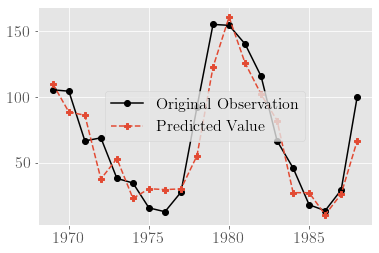

289    140.889482
dtype: float64


In [ ]:
import pandas as pd, numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.rc('font',family='SimHei')
plt.rc('font',size=16)
d = pd.read_csv('./data/sunspots.csv', usecols=['counts'])

md = sm.tsa.ARIMA(d, order=(9, 0, 1)).fit() # ARIMA(p,0,q)，即ARMA(p,q)
years = np.arange(1700, 1989)  #已知观测值的年代
dhat = md.predict()
plt.plot(years[-20:], d.values[-20:], 'o-k')
plt.plot(years[-20:], dhat.values[-20:], 'P--')
plt.legend(('Original Observation', 'Predicted Value'))
plt.show()
dnext = md.predict(d.shape[0], d.shape[0])
print(dnext)  #显示下一期的预测值

对于上例, 下面给出一个完整的建模步骤.
第一步: 画出原始数据的折线图, 初步确定观测数据是平稳的. 画出序列的自相关图和偏相关图.
第二步: 利用 AIC 和 BIC 准则, 确定选择 $\operatorname{ARMA}(4,2)$, 利用 Python 软件, 求得模型的计算结果, 残差取值及分布.
第三步: 利用得到的模型, 得到 1989 年太阳黑子预测值为 139 个. 原始数据及其预测值对比.

d:\programme\python\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


[1, 1, 2534.41529731524, 2549.0810040676897]
[1, 2, 2486.3625230803455, 2504.6946565209078]
[1, 3, 2481.646979063951, 2503.6455391926256]
[1, 4, 2501.810774430834, 2527.475761247621]
[1, 5, 2478.462260496462, 2507.7936740013615]
[2, 1, 2451.5373784871113, 2469.8695119276736]
[2, 2, 2452.4263853725743, 2474.4249455012487]
[2, 3, 2454.395382327696, 2480.060369144483]
[2, 4, 2436.757559730526, 2466.0889732354253]
[2, 5, 2435.389801927289, 2468.3876421203013]
[3, 1, 2450.798655438148, 2472.7972155668226]
[3, 2, 2452.7865732718337, 2478.4515600886207]


d:\programme\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\programme\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


[3, 3, 2411.6547710065793, 2440.9861845114788]
[3, 4, 2411.7421002547635, 2444.7399404477756]


d:\programme\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


[3, 5, 2408.4029383287148, 2445.067205209839]
[4, 1, 2452.788049453518, 2478.453036270305]


d:\programme\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\programme\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


[4, 2, 2451.5006245697655, 2480.832038074665]


d:\programme\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


[4, 3, 2451.633536698205, 2484.631376891217]
[4, 4, 2410.7025760749657, 2447.36684295609]


d:\programme\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


[4, 5, 2410.298140016076, 2450.628833585313]
[5, 1, 2454.6752681155776, 2484.006681620477]


d:\programme\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


[5, 2, 2451.410060046332, 2484.407900239344]


d:\programme\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


[5, 3, 2453.383498333418, 2490.0477652145423]


d:\programme\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


[5, 4, 2411.0638861732878, 2451.3945797425245]


d:\programme\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


[5, 5, 2412.309252780483, 2456.306373037832]


d:\programme\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                 counts   No. Observations:                  289
Model:                 ARIMA(4, 0, 2)   Log Likelihood               -1217.750
Date:                Wed, 09 Aug 2023   AIC                           2451.501
Time:                        15:34:47   BIC                           2480.832
Sample:                             0   HQIC                          2463.254
                                - 289                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.8289      4.107     11.888      0.000      40.778      56.879
ar.L1         -0.1270      0.086     -1.482      0.138      -0.295       0.041
ar.L2          0.5361      0.067      7.966      0.0

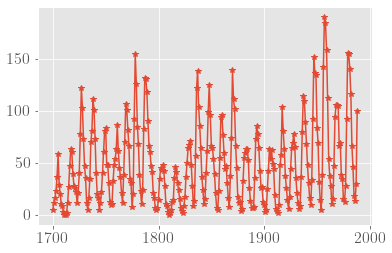

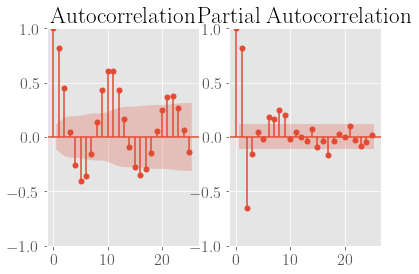

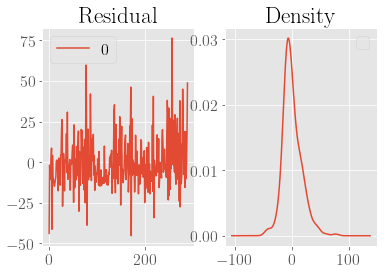

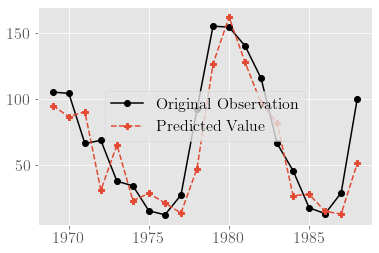

In [ ]:
import pandas as pd, numpy as np
import statsmodels.api as sm
import matplotlib.pylab as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rc('axes', unicode_minus=False)
plt.rc('font', family='SimHei')
plt.rc('font', size=16)
d = pd.read_csv('./data/sunspots.csv')
dd = d['counts']
years = d['year'].values.astype(int)
plt.plot(years, dd.values, '-*')
plt.figure()
ax1 = plt.subplot(121)
plot_acf(dd, ax=ax1, title='Autocorrelation')
ax2 = plt.subplot(122)
plot_pacf(dd, ax=ax2, title='Partial Autocorrelation')

for i in range(1, 6):
    for j in range(1, 6):
        md = sm.tsa.ARIMA(dd, order=(i, 0, j)).fit() # ARIMA(p,0,q)，即ARMA(p,q)
        print([i, j, md.aic, md.bic])
zmd = sm.tsa.ARIMA(dd, order=(4, 0, 2)).fit() # ARIMA(p,0,q)，即ARMA(p,q)
print(zmd.summary())  #显示模型的所有信息

residuals = pd.DataFrame(zmd.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residual", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.legend('')
plt.ylabel('')

dhat = zmd.predict()
plt.figure()
plt.plot(years[-20:], dd.values[-20:], 'o-k')
plt.plot(years[-20:], dhat.values[-20:], 'P--')
plt.legend(('Original Observation', 'Predicted Value'))
dnext = zmd.predict(d.shape[0], d.shape[0])
print(dnext)  #显示下一期的预测值
plt.show()

## 3. 非平稳时间序列
上节介绍了对平稳时间序列的分析方法. 实际上, 在自然界中绝大部分序列都是非平稳的.

### 3.1 差分运算
差分方法是一种非常简便、有效的确定性信息提取方法. Cramer 分解定理在理论上保证了适当阶数的差分一定可以充分提取确定性信息. 差分运算的实际是使用自回归的方式提取确定性信息.
$$
\nabla^d X_t=(1-B)^d X_t=\sum_{i=0}^d(-1)^i \mathrm{C}_d^i X_{t-i} .
$$
在实践操作中, 会根据序列不同的特点选择合适的差分方式, 常见情况有以下三种:
(1) 序列蕴含着显著的**线性趋势**, 一阶差分就可以实现平稳.
(2) 序列蕴含着**曲线趋势**, 通常二阶或三阶差分就可以提取曲线趋势的影响.
(3) 对于蕴含着**固定周期的序列**进行步长为周期长度的差分运算, 通常可以较好地提取周期信息.
从理论上来说, 足够多次的差分运算可以充分地提取原序列中的**非平稳确定性信息**, 但是, 过度的差分会造成有用信息的浪费. 因此, 在实际运用中差分运算阶数应当要适当, 避免过度差分.

### 3.2 ARIMA 模型
差分运算具有强大的确定信息提取能力, 对差分运算后得到的平稳序列可用 ARMA 模型进行拟合.
具有如下结构的模型称为 $\operatorname{ARIMA}(p, d, q)$ 模型:
$$
\left\{\begin{array}{l}
\phi(B) \nabla^d X_t=\theta(B) \varepsilon_t, \\
E\left(\varepsilon_t\right)=0, \quad \operatorname{Var}\left(\varepsilon_t\right)=\sigma_{\varepsilon}^2, \quad E\left(\varepsilon_t \varepsilon_s\right)=0, \quad s \neq t, \\
E\left(X_s \varepsilon_t\right)=0, \quad \forall s<t .
\end{array}\right. \tag{(28)}
$$
特别地, 当 $d=0$ 时, $\operatorname{ARIMA}(p, d, q)$ 模型实际上就是 $\operatorname{ARMA}(p, q)$ 模型. 当 $p=0$ 时, $\operatorname{ARIMA}(p, d, q)$ 模型实际上就是 $\operatorname{IMA}(d, q)$ 模型.
当 $q=0$ 时, $\operatorname{ARIMA}(p, d, q)$ 模型实际上就是 $\operatorname{ARI}(p, d)$ 模型.
当 $d=1, p=q=0$ 时, $\operatorname{ARIMA}(p, d, q)$ 模型记为
$$
\left\{\begin{array}{l}
X_t=X_{t-1}+\varepsilon_t, \\
E\left(\varepsilon_t\right)=0, \quad \operatorname{Var}\left(\varepsilon_t\right)=\sigma_{\varepsilon}^2, \quad E\left(\varepsilon_t \varepsilon_s\right)=0, \quad s \neq t, \\
E\left(X_s \varepsilon_t\right)=0, \quad \forall s<t .
\end{array}\right.
$$
该模型称为**随机游走模型**.
ARIMA 模型建模与 ARMA 模型建模过程类似.

**例** 试利用文件 austa.csv, 建立适当的 ARIMA 模型。
**解** 原始数据的一次差分及差分数据的自相关图如程序输出图所示. 通过试着取 $p, q$ 的一些值, 根据 AIC 和 BIC 等指标, 确定建立 ARIMA $(2,1,0)$ 模型. 利用 Python 软件, 求得的残差取值及分布如程序输出图所示. 得到的预测值与原始数据的对比如程序输出图所示.

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   31
Model:                 ARIMA(2, 1, 0)   Log Likelihood                   5.753
Date:                Wed, 23 Aug 2023   AIC                             -5.507
Time:                        11:51:15   BIC                             -1.303
Sample:                             0   HQIC                            -4.162
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4962      0.196      2.532      0.011       0.112       0.880
ar.L2          0.0485      0.215      0.225      0.822      -0.373       0.470
sigma2         0.0395      0.012      3.193      0.0

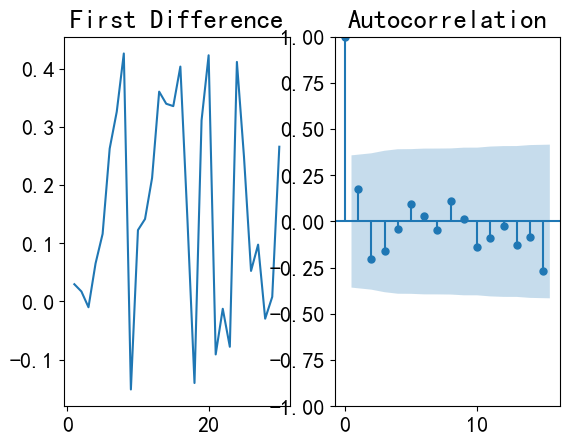

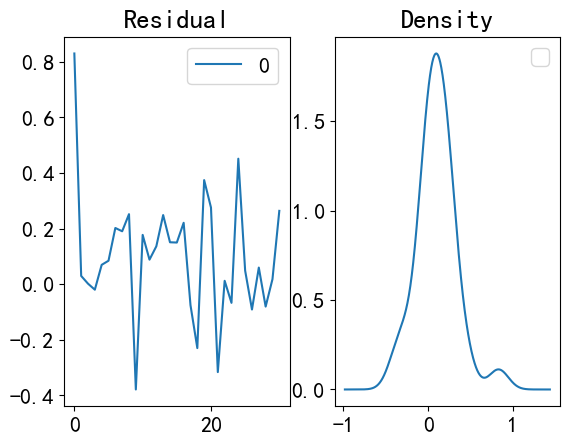

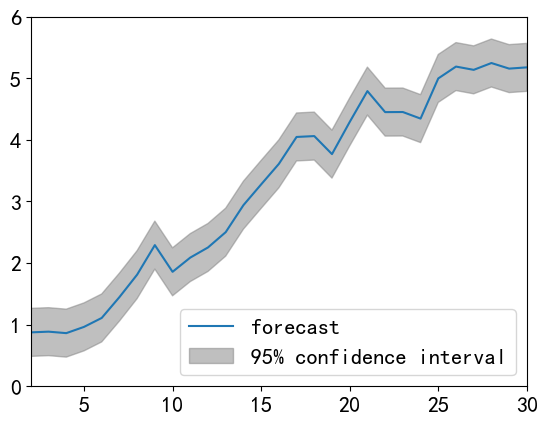

In [1]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import pylab as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

plt.rc('axes', unicode_minus=False)
plt.rc('font', size=16)
plt.rc('font', family='SimHei')

df = pd.read_csv('./data/austa.csv')
# print(df)


plt.subplot(121)
plt.plot(df.value.diff())
plt.title('First Difference')
ax2 = plt.subplot(122)
plot_acf(df.value.diff().dropna(), ax=ax2, title='Autocorrelation')

md = ARIMA(df.value, order=(2, 1, 0))
mdf = md.fit()
print(mdf.summary())

residuals = pd.DataFrame(mdf.resid)
fig, ax = plt.subplots(1, 2)
residuals.plot(title="Residual", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.legend('')
plt.ylabel('')

plot_predict(mdf)  #原始数据与预测值对比图
plt.xlim(2, 30)
plt.ylim(0, 6)
plt.show()